# PARTE 1: IMPORTACIÓN DE LIBRERÍAS

In [90]:
# Librerías para manipulación de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt

# Librerías para machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPRegressor

# PARTE 2: CARGA Y PREPARACIÓN DE DATOS


#### Procesar la data 

In [91]:
# Cargamos los datos
print("Cargando datos...")
train_data = pd.read_csv('../../train.csv')


Cargando datos...


#### Seleccionar Categorías 

In [92]:
# Seleccionamos las características que vamos a utilizar
features = [
    'OverallQual',    # Calidad general
    'GrLivArea',      # Área habitable
    'GarageCars',     # Capacidad del garaje
    'YearBuilt',      # Año de construcción
    'TotalBsmtSF',    # Superficie total del sótano
    'FullBath',       # Baños completos
    'Neighborhood',   # Vecindario (categórica)
    'ExterQual',      # Calidad del exterior (categórica)
    'KitchenQual',    # Calidad de la cocina (categórica)
    'BsmtQual'        # Calidad del sótano (categórica)
]

In [93]:
target = 'SalePrice'

# Seleccionamos solo las columnas que necesitamos
X = train_data[features].copy()
y = train_data[target].copy()


In [94]:
# Para columnas numéricas, rellenamos con la mediana
numeric_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt', 'TotalBsmtSF', 'FullBath']
for col in numeric_features:
    X[col] = X[col].fillna(X[col].median())

# Para columnas categóricas, rellenamos con el valor más frecuente
categorical_features = ['Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual']
for col in categorical_features:
    X[col] = X[col].fillna(X[col].mode()[0])



# PARTE 3: DIVISIÓN DE DATOS EN ENTRENAMIENTO Y PRUEBA


In [95]:
# Dividimos los datos en conjuntos de entrenamiento (80%) y prueba (20%)
print("Dividiendo datos en conjuntos de entrenamiento y prueba...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Dividiendo datos en conjuntos de entrenamiento y prueba...


# PARTE 4: CREACIÓN DE PIPELINES DE PREPROCESAMIENTO

In [96]:
# Creamos pipelines de preprocesamiento para datos numéricos y categóricos
print("Configurando preprocesamiento de datos...")

# Transformador para datos numéricos (estandarización)
numeric_transformer = StandardScaler()

# Transformador para datos categóricos (codificación one-hot)
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combinamos los pasos de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


Configurando preprocesamiento de datos...


# PARTE 5: CREACIÓN DE MODELOS DE REDES NEURONALES

In [97]:
print("Creando modelos de redes neuronales...")

# Modelo 1: Topología simple con activación ReLU
# - Dos capas ocultas (10 y 5 neuronas)
# - Función de activación ReLU
# - Optimizador Adam
model1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor(
        hidden_layer_sizes=(10, 5),  # Dos capas con 10 y 5 neuronas
        activation='relu',          # Función de activación ReLU
        solver='adam',              # Optimizador Adam
        alpha=0.001,                # Parámetro de regularización
        batch_size=32,              # Tamaño del lote
        learning_rate_init=0.001,   # Tasa de aprendizaje inicial
        max_iter=500,               # Número máximo de iteraciones
        random_state=42,            # Semilla para reproducibilidad
        verbose=True                # Mostrar progreso
    ))
])

model1

Creando modelos de redes neuronales...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['OverallQual', 'GrLivArea',
                                                   'GarageCars', 'YearBuilt',
                                                   'TotalBsmtSF', 'FullBath']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Neighborhood', 'ExterQual',
                                                   'KitchenQual',
                                                   'BsmtQual'])])),
                ('regressor',
                 MLPRegressor(alpha=0.001, batch_size=32,
                              hidden_layer_sizes=(10, 5), max_iter=500,
                              random_state=42, verbose=True))])

In [98]:
# Modelo 2: Topología más compleja con activación tanh
# - Tres capas ocultas (20, 10 y 5 neuronas)
# - Función de activación tangente hiperbólica
# - Optimizador Adam
model2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor(
        hidden_layer_sizes=(20, 10, 5),  # Tres capas con 20, 10 y 5 neuronas
        activation='tanh',              # Función de activación tangente hiperbólica
        solver='adam',                  # Optimizador Adam
        alpha=0.0001,                   # Parámetro de regularización
        batch_size=64,                  # Tamaño del lote
        learning_rate_init=0.01,        # Tasa de aprendizaje inicial
        max_iter=500,                   # Número máximo de iteraciones
        random_state=42,                # Semilla para reproducibilidad
        verbose=True                    # Mostrar progreso
    ))
])

model2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['OverallQual', 'GrLivArea',
                                                   'GarageCars', 'YearBuilt',
                                                   'TotalBsmtSF', 'FullBath']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Neighborhood', 'ExterQual',
                                                   'KitchenQual',
                                                   'BsmtQual'])])),
                ('regressor',
                 MLPRegressor(activation='tanh', batch_size=64,
                              hidden_layer_sizes=(20, 10, 5),
                              learning_rate_init=0.01, max_iter=500,
                              random_state=42, verbose=True))])

# PARTE 6: ENTRENAMIENTO DE MODELOS


In [99]:

# Train Model 1
print("Training Model 1 (ReLU activation)...")
model1.fit(X_train, y_train)

# Train Model 2
print("Training Model 2 (tanh activation)...")
model2.fit(X_train, y_train)


Training Model 1 (ReLU activation)...
Iteration 1, loss = 19442663412.42499924
Iteration 2, loss = 19442529839.53115082
Iteration 3, loss = 19442290211.05839920
Iteration 4, loss = 19441889850.09080505
Iteration 5, loss = 19441227955.60629654
Iteration 6, loss = 19440265751.43597412
Iteration 7, loss = 19438953923.47204971
Iteration 8, loss = 19437212675.62014771
Iteration 9, loss = 19434961071.72716522
Iteration 10, loss = 19432105629.57643127
Iteration 11, loss = 19428551299.91969299
Iteration 12, loss = 19424186636.27285385
Iteration 13, loss = 19419014599.75443649
Iteration 14, loss = 19412944165.90571213
Iteration 15, loss = 19405992440.79373550
Iteration 16, loss = 19398022425.62843704
Iteration 17, loss = 19388980066.60637665
Iteration 18, loss = 19378781541.51203156
Iteration 19, loss = 19367277945.22578812
Iteration 20, loss = 19354379876.43452835
Iteration 21, loss = 19340137126.67878342
Iteration 22, loss = 19324321098.44248581
Iteration 23, loss = 19307156987.32382202
Itera

c:\Users\villa\Desktop\Clases_S7\2.Minería de Datos\3.Proyecto2\InmoValor_SA\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 23, loss = 19437468173.76620865
Iteration 24, loss = 19437260962.86098480
Iteration 25, loss = 19437052350.52129745
Iteration 26, loss = 19436844541.69026947
Iteration 27, loss = 19436636068.19214249
Iteration 28, loss = 19436429023.91258240
Iteration 29, loss = 19436222367.74490356
Iteration 30, loss = 19436014779.05013657
Iteration 31, loss = 19435807621.92670441
Iteration 32, loss = 19435600074.05855560
Iteration 33, loss = 19435391966.91947937
Iteration 34, loss = 19435185061.08665085
Iteration 35, loss = 19434976819.96113205
Iteration 36, loss = 19434771737.93853378
Iteration 37, loss = 19434564241.48101044
Iteration 38, loss = 19434358795.42709732
Iteration 39, loss = 19434152144.63374710
Iteration 40, loss = 19433945224.84870529
Iteration 41, loss = 19433739112.68360519
Iteration 42, loss = 19433531826.69968033
Iteration 43, loss = 19433325224.44237518
Iteration 44, loss = 19433117431.26535416
Iteration 45, loss = 19432910732.20967102
Iteration 46, loss = 19432703742.1

c:\Users\villa\Desktop\Clases_S7\2.Minería de Datos\3.Proyecto2\InmoValor_SA\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['OverallQual', 'GrLivArea',
                                                   'GarageCars', 'YearBuilt',
                                                   'TotalBsmtSF', 'FullBath']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Neighborhood', 'ExterQual',
                                                   'KitchenQual',
                                                   'BsmtQual'])])),
                ('regressor',
                 MLPRegressor(activation='tanh', batch_size=64,
                              hidden_layer_sizes=(20, 10, 5),
                              learning_rate_init=0.01, max_iter=500,
                              random_state=42, verbose=True))])

# PARTE 7: FUNCIÓN DE EVALUACIÓN DE MODELOS


In [100]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    """
    Evalúa el rendimiento del modelo en los conjuntos de entrenamiento y prueba.
    
    Parámetros:
    -----------
    model : Pipeline
        Modelo de red neuronal entrenado
    X_train : DataFrame
        Características del conjunto de entrenamiento
    y_train : Series
        Variable objetivo del conjunto de entrenamiento
    X_test : DataFrame
        Características del conjunto de prueba
    y_test : Series
        Variable objetivo del conjunto de prueba
    model_name : str
        Nombre del modelo para mostrar en los resultados
        
    Retorna:
    --------
    tuple : (RMSE en prueba, R² en prueba)
    """
    # PASO 1: Obtenemos predicciones en el conjunto de entrenamiento
    y_train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # PASO 2: Obtenemos predicciones en el conjunto de prueba
    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # PASO 3: Mostramos métricas de regresión
    print(f"\n{model_name} - Métricas de Regresión:")
    print(f"RMSE en Entrenamiento: ${train_rmse:.2f}")
    print(f"R² en Entrenamiento: {train_r2:.4f}")
    print(f"RMSE en Prueba: ${test_rmse:.2f}")
    print(f"R² en Prueba: {test_r2:.4f}")
    
    # PASO 4: Calculamos métricas de clasificación (binning de precios)
    try:
        # Limpiamos valores NaN
        y_train_clean = pd.Series(y_train).fillna(y_train.median())
        y_test_clean = pd.Series(y_test).fillna(y_test.median())
        y_train_pred_clean = pd.Series(y_train_pred).fillna(np.median(y_train_pred))
        y_test_pred_clean = pd.Series(y_test_pred).fillna(np.median(y_test_pred))
        
        # Creamos bins basados en cuartiles de la variable objetivo
        all_values = pd.concat([y_train_clean, y_test_clean])
        bins = [
            all_values.min() - 1,           # Mínimo con margen
            all_values.quantile(0.25),      # Primer cuartil (25%)
            all_values.quantile(0.5),       # Mediana (50%)
            all_values.quantile(0.75),      # Tercer cuartil (75%)
            all_values.max() + 1            # Máximo con margen
        ]
        labels = [0, 1, 2, 3]  # 4 categorías de precio
        
        # Convertimos valores continuos a categorías
        y_train_binned = pd.cut(y_train_clean, bins=bins, labels=labels).astype(int)
        y_test_binned = pd.cut(y_test_clean, bins=bins, labels=labels).astype(int)
        
        # Aseguramos que los valores predichos estén dentro del rango
        y_train_pred_clean = np.clip(y_train_pred_clean, all_values.min(), all_values.max())
        y_test_pred_clean = np.clip(y_test_pred_clean, all_values.min(), all_values.max())
        
        # Discretizamos las predicciones
        y_train_pred_binned = pd.cut(y_train_pred_clean, bins=bins, labels=labels).astype(int)
        y_test_pred_binned = pd.cut(y_test_pred_clean, bins=bins, labels=labels).astype(int)
        
        # Calculamos métricas de clasificación
        cm = confusion_matrix(y_test_binned, y_test_pred_binned)
        accuracy = accuracy_score(y_test_binned, y_test_pred_binned)
        precision = precision_score(y_test_binned, y_test_pred_binned, average='micro')
        recall = recall_score(y_test_binned, y_test_pred_binned, average='micro')
        f1 = f1_score(y_test_binned, y_test_pred_binned, average='micro')
        
        # Mostramos métricas de clasificación
        print(f"\n{model_name} - Métricas de Clasificación (después de discretizar precios):")
        print('Matriz de Confusión:\n', cm)
        print('Exactitud (Accuracy): ', accuracy)
        print('Precisión (Precision): ', precision)
        print('Exhaustividad (Recall): ', recall)
        print('Puntuación F1 (F1 Score): ', f1)
    except Exception as e:
        print(f"\nError al calcular métricas de clasificación: {e}")
        print("Continuando con métricas de regresión y visualizaciones...")
    
    # PASO 5: Visualización - Precios reales vs predichos
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Precio Real')
    plt.ylabel('Precio Predicho')
    plt.title(f'{model_name}: Precios Reales vs Predichos')
    plt.show()
    
    # PASO 6: Visualización - Gráfico de residuos
    residuals = y_test - y_test_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_pred, residuals, alpha=0.5)
    plt.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max(), colors='r', linestyles='--')
    plt.xlabel('Precio Predicho')
    plt.ylabel('Residuos')
    plt.title(f'{model_name}: Gráfico de Residuos')
    plt.show()
    
    return test_rmse, test_r2

# PARTE 8: EVALUACIÓN DE MODELOS



Evaluando modelos...

Modelo 1 (ReLU) - Métricas de Regresión:
RMSE en Entrenamiento: $34923.29
R² en Entrenamiento: 0.7955
RMSE en Prueba: $35828.59
R² en Prueba: 0.8326

Modelo 1 (ReLU) - Métricas de Clasificación (después de discretizar precios):
Matriz de Confusión:
 [[70  9  2  0]
 [22 39 18  1]
 [ 0  4 42 17]
 [ 0  0  7 61]]
Exactitud (Accuracy):  0.726027397260274
Precisión (Precision):  0.726027397260274
Exhaustividad (Recall):  0.726027397260274
Puntuación F1 (F1 Score):  0.726027397260274


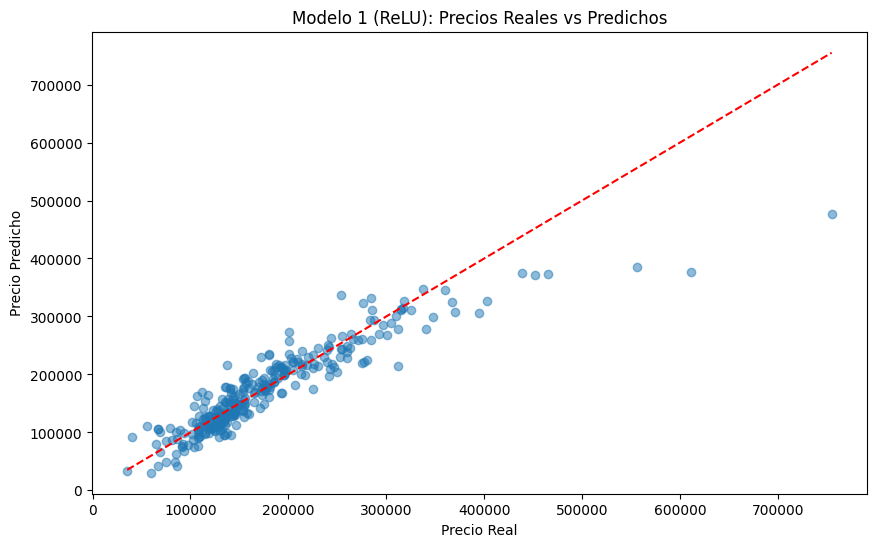

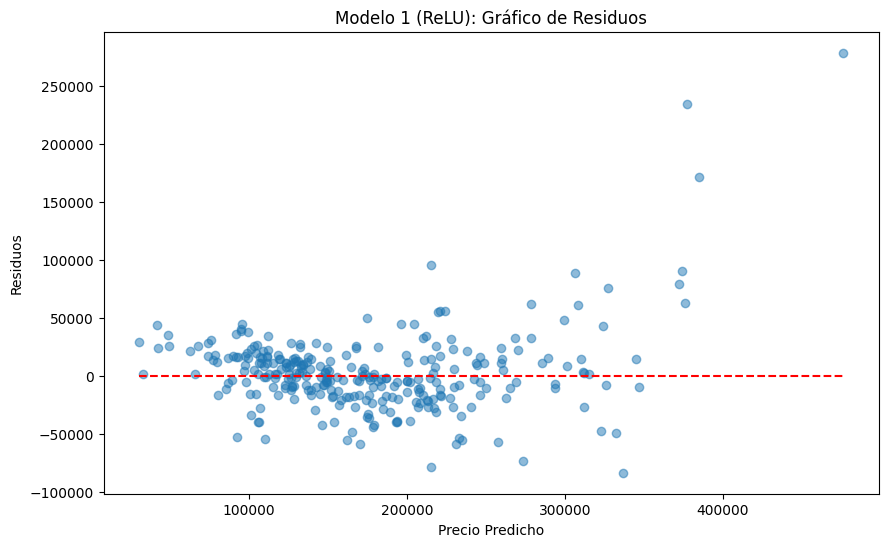


Modelo 2 (tanh) - Métricas de Regresión:
RMSE en Entrenamiento: $196667.27
R² en Entrenamiento: -5.4846
RMSE en Prueba: $198618.78
R² en Prueba: -4.1431

Modelo 2 (tanh) - Métricas de Clasificación (después de discretizar precios):
Matriz de Confusión:
 [[81  0  0  0]
 [80  0  0  0]
 [63  0  0  0]
 [68  0  0  0]]
Exactitud (Accuracy):  0.2773972602739726
Precisión (Precision):  0.2773972602739726
Exhaustividad (Recall):  0.2773972602739726
Puntuación F1 (F1 Score):  0.2773972602739726


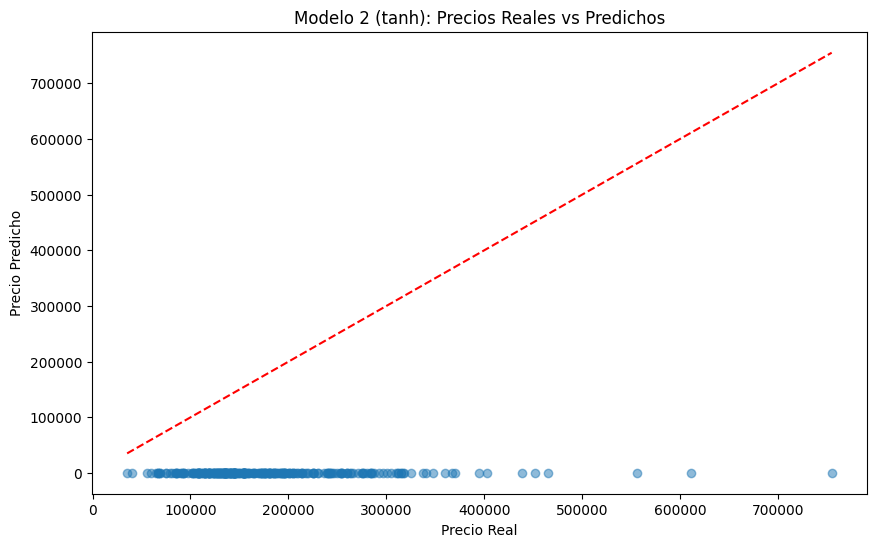

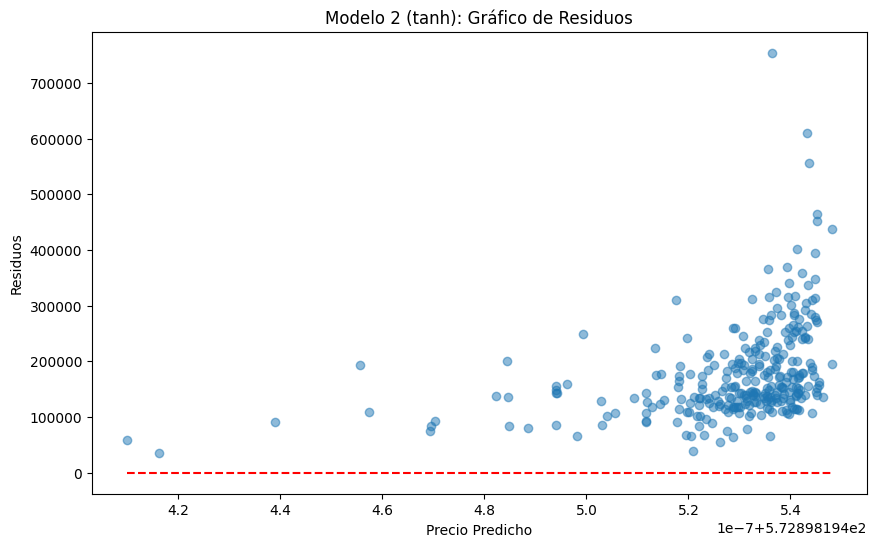

In [101]:
print("\nEvaluando modelos...")
# Evaluamos el Modelo 1
model1_rmse, model1_r2 = evaluate_model(model1, X_train, y_train, X_test, y_test, "Modelo 1 (ReLU)")

# Evaluamos el Modelo 2
model2_rmse, model2_r2 = evaluate_model(model2, X_train, y_train, X_test, y_test, "Modelo 2 (tanh)")



# PARTE 9: FUNCIÓN PARA PREDECIR PRECIOS DE CASAS


In [102]:
def predict_house_price(model, example_house):
    """
    Predice el precio de una casa utilizando el modelo entrenado.
    
    Parámetros:
    -----------
    model : Pipeline
        Modelo de red neuronal entrenado
    example_house : dict
        Diccionario con las características de la casa
        
    Retorna:
    --------
    float : Precio predicho de la casa
    """
    # Convertimos el diccionario a DataFrame (formato requerido por el pipeline)
    example_df = pd.DataFrame([example_house])
    
    # Realizamos la predicción
    predicted_price = model.predict(example_df)[0]
    
    return predicted_price

# PARTE 10: EJEMPLOS DE PREDICCIÓN


In [104]:
# Ejemplo de uso con casas de muestra
print("\n\n" + "="*50)
print("EJEMPLO: PREDICCIÓN DE PRECIO PARA UNA CASA ESPECÍFICA")
print("="*50)

# Elegimos el modelo con mejor rendimiento
better_model = model1 if model1_r2 > model2_r2 else model2
model_name = "Modelo 1 (ReLU)" if model1_r2 > model2_r2 else "Modelo 2 (tanh)"

# EJEMPLO 1: Casa de alta calidad
print("\nEJEMPLO 1: CASA DE ALTA CALIDAD")
# Definimos características de la casa
example_house = {
    'OverallQual': 7,          # Calidad general buena (7 de 10)
    'GrLivArea': 1710,         # 1,710 pies cuadrados de área habitable
    'GarageCars': 2,           # Garaje para 2 autos
    'YearBuilt': 2003,         # Construida en 2003
    'TotalBsmtSF': 856,        # 856 pies cuadrados de sótano
    'FullBath': 2,             # 2 baños completos
    'Neighborhood': 'CollgCr', # Vecindario College Creek
    'ExterQual': 'Gd',         # Calidad exterior buena
    'KitchenQual': 'Gd',       # Calidad de cocina buena
    'BsmtQual': 'Gd'           # Calidad de sótano buena
}

# Obtenemos la predicción
predicted_price = predict_house_price(better_model, example_house)

# Mostramos detalles de la casa
print(f"\nDetalles de la casa:")
print(f"- {example_house['GrLivArea']} pies² en {example_house['Neighborhood']}")
print(f"- Construida en {example_house['YearBuilt']} con calidad general {example_house['OverallQual']}/10")
print(f"- Garaje para {example_house['GarageCars']} autos, {example_house['FullBath']} baños completos")
print(f"- {example_house['TotalBsmtSF']} pies² de sótano con calidad {example_house['BsmtQual']}")
print(f"- Calidad exterior {example_house['ExterQual']}, calidad de cocina {example_house['KitchenQual']}")

# Mostramos el precio predicho
print(f"\nPrecio Predicho (usando {model_name}): ${predicted_price:,.2f}")

# EJEMPLO 2: Casa más antigua y modesta
print("\n" + "-"*40)
print("EJEMPLO 2: CASA MÁS ANTIGUA Y MODESTA")
print("-"*40)

# Definimos características de otra casa
another_example = {
    'OverallQual': 5,          # Calidad promedio (5 de 10)
    'GrLivArea': 1500,         # 1,500 pies cuadrados de área habitable
    'GarageCars': 1,           # Garaje para 1 auto
    'YearBuilt': 1970,         # Construida en 1970
    'TotalBsmtSF': 700,        # 700 pies cuadrados de sótano
    'FullBath': 1,             # 1 baño completo
    'Neighborhood': 'OldTown', # Vecindario centro antiguo
    'ExterQual': 'TA',         # Calidad exterior típica/promedio
    'KitchenQual': 'TA',       # Calidad de cocina típica/promedio
    'BsmtQual': 'TA'           # Calidad de sótano típica/promedio
}

# Obtenemos la predicción
another_predicted_price = predict_house_price(better_model, another_example)

# Mostramos detalles de la casa
print(f"\nDetalles de la casa:")
print(f"- {another_example['GrLivArea']} pies² en {another_example['Neighborhood']}")
print(f"- Construida en {another_example['YearBuilt']} con calidad general {another_example['OverallQual']}/10")
print(f"- Garaje para {another_example['GarageCars']} auto, {another_example['FullBath']} baño completo")
print(f"- {another_example['TotalBsmtSF']} pies² de sótano con calidad {another_example['BsmtQual']}")
print(f"- Calidad exterior {another_example['ExterQual']}, calidad de cocina {another_example['KitchenQual']}")

# Mostramos el precio predicho
print(f"\nPrecio Predicho (usando {model_name}): ${another_predicted_price:,.2f}")



EJEMPLO: PREDICCIÓN DE PRECIO PARA UNA CASA ESPECÍFICA

EJEMPLO 1: CASA DE ALTA CALIDAD

Detalles de la casa:
- 1710 pies² en CollgCr
- Construida en 2003 con calidad general 7/10
- Garaje para 2 autos, 2 baños completos
- 856 pies² de sótano con calidad Gd
- Calidad exterior Gd, calidad de cocina Gd

Precio Predicho (usando Modelo 1 (ReLU)): $207,618.36

----------------------------------------
EJEMPLO 2: CASA MÁS ANTIGUA Y MODESTA
----------------------------------------

Detalles de la casa:
- 1500 pies² en OldTown
- Construida en 1970 con calidad general 5/10
- Garaje para 1 auto, 1 baño completo
- 700 pies² de sótano con calidad TA
- Calidad exterior TA, calidad de cocina TA

Precio Predicho (usando Modelo 1 (ReLU)): $131,704.04
